In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline

#over/under sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

#feature selection/dimensionality reduction
from sklearn.feature_selection import RFE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### Import Dataset

In [3]:
dataset = pd.read_csv("MCSDatasetNEXTCONLab.csv")

In [4]:
dataset

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


### Prepare Dataset

In [5]:
dataset['Ligitimacy'] = dataset['Ligitimacy'].replace(0,-1)

trDf = dataset[:10139][:]
teDf = dataset[10139:][:]

trDf = trDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
trDf = trDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)
teDf = teDf.apply(lambda x: (x-45)*10000 if x.name == 'Latitude' else x)
teDf = teDf.apply(lambda x: (x+75)*10000 if x.name == 'Longitude' else x)

trY = trDf['Ligitimacy'].values
teY = teDf['Ligitimacy'].values
trX = trDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values
teX = teDf.drop(columns=['ID', 'Day', 'Ligitimacy']).values

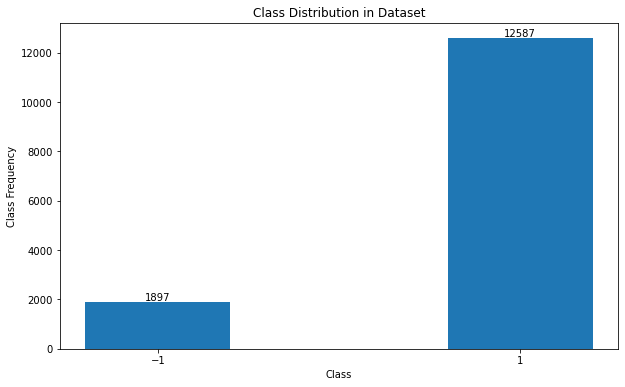

In [6]:
classes = dataset['Ligitimacy'].value_counts()

class_labels = np.unique(dataset['Ligitimacy'])
frequency = [classes[-1] , classes[1]]

fig, ax = plt.subplots(figsize=(10,6))

p1 = ax.bar(class_labels, frequency)
ax.set_xticks(class_labels)
ax.set_xlabel("Class")
ax.set_ylabel("Class Frequency")
ax.set_title('Class Distribution in Dataset')
ax.bar_label(p1)
plt.show()

### Method to print required accuracies metrics

In [7]:
def print_accuracy(model, teY, predY, teX):
    
    acc = accuracy_score(teY, predY) * 100 
    print("Accuracy: {:.2f}%\n".format(acc))
    print('\nClassification Report:\n')
    print(classification_report(teY, predY))
    
    print("---------------------------------------------\n")
    
    fig, ax = plt.subplots(figsize=(7, 7))
    print('\nConfusion Matrix:')
    plot_confusion_matrix(model, teX, teY,
                          xticks_rotation='horizontal',
                          ax=ax, cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.show()
    
    return acc 

### Method to build models

In [8]:
def build_model(model, trX, trY, teX, teY):
    
    model.fit(trX, trY)
    
    model_pred = model.predict(teX)
    
    acc = print_accuracy(model, teY, model_pred, teX)
    
    
    return model_pred, round(acc,3)

# Part 1

## Q1. Apply only three of the following ML methods

### 1. KNN

Accuracy: 98.11%


Classification Report:

              precision    recall  f1-score   support

          -1       0.90      0.97      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.95      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


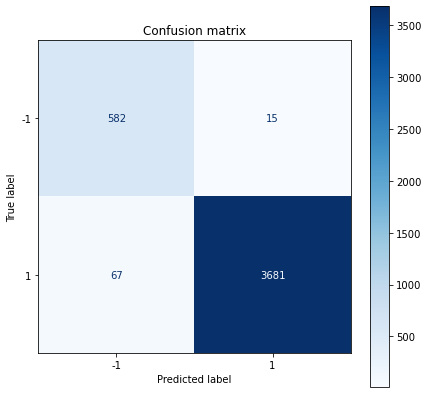

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_pred, knn_acc = build_model(knn_model, trX, trY, teX, teY)

### 2. Logistic Regression

Accuracy: 86.26%


Classification Report:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       597
           1       0.86      1.00      0.93      3748

    accuracy                           0.86      4345
   macro avg       0.43      0.50      0.46      4345
weighted avg       0.74      0.86      0.80      4345

---------------------------------------------


Confusion Matrix:


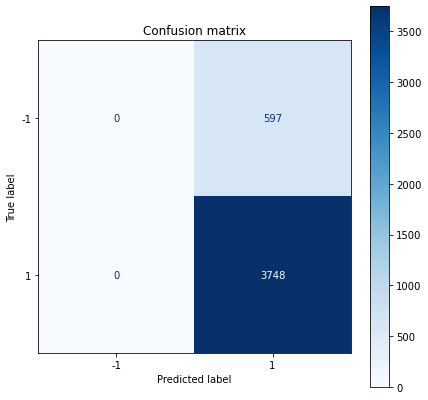

In [10]:
lr_model = LogisticRegression(random_state=0)
lr_pred , lr_acc = build_model(lr_model, trX, trY, teX, teY)

### 3. SVM

Accuracy: 86.26%


Classification Report:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       597
           1       0.86      1.00      0.93      3748

    accuracy                           0.86      4345
   macro avg       0.43      0.50      0.46      4345
weighted avg       0.74      0.86      0.80      4345

---------------------------------------------


Confusion Matrix:


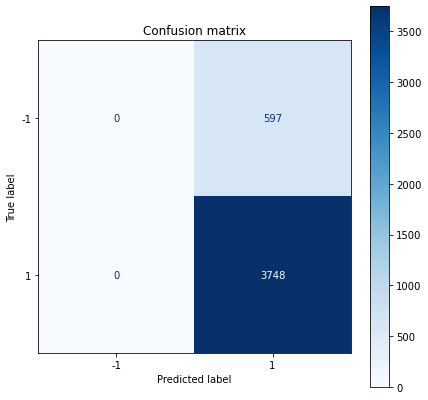

In [11]:
svm_model = SVC(kernel='rbf', random_state=0)
svm_pred , svm_acc = build_model(svm_model, trX, trY, teX, teY)

### 4. Decision Tree Classifier

Accuracy: 95.35%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.77      0.82       597
           1       0.96      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.92      0.88      0.90      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


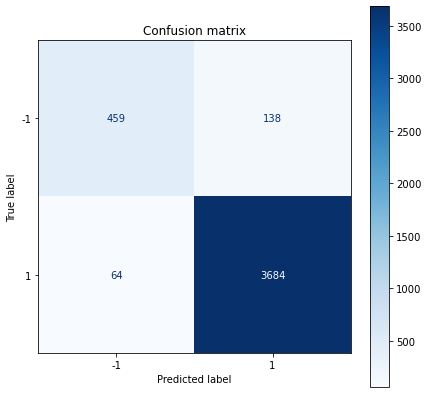

In [12]:
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_pred , dt_acc = build_model(dt_model, trX, trY, teX, teY)

### 5. Adaboost Classifier

Accuracy: 97.65%


Classification Report:

              precision    recall  f1-score   support

          -1       0.95      0.87      0.91       597
           1       0.98      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.97      0.93      0.95      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


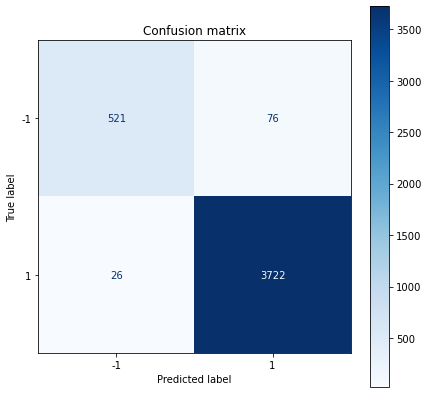

In [13]:
ada_model = AdaBoostClassifier(n_estimators=200, random_state=0)
ada_pred , ada_acc = build_model(ada_model, trX, trY, teX, teY)

### Plot Bar Chart 

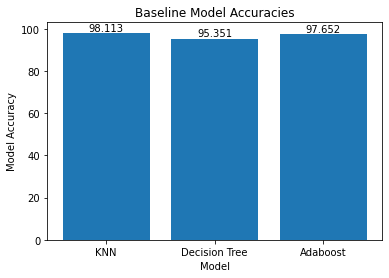

In [14]:
models = ['KNN' , 'Decision Tree' , 'Adaboost']
model_acc = [knn_acc , dt_acc , ada_acc]

fig, ax = plt.subplots()

p1 = ax.bar(models, model_acc)
ax.set_xlabel("Model")
ax.set_ylabel("Model Accuracy")
ax.set_title('Baseline Model Accuracies')
ax.bar_label(p1)
plt.show()

## Q2. To study the impact of over/under-sampling

### 1. SMOTE

In [15]:
smote_oversampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote_oversampler.fit_resample(trX, trY)

### KNN w/ SMOTE

Accuracy: 97.86%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


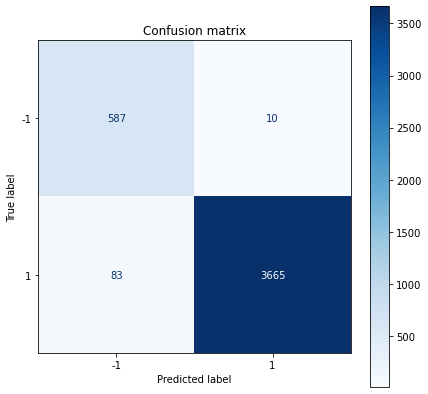

In [18]:
knn_smote = KNeighborsClassifier(n_neighbors=3)
knn_pred_smote , knn_acc_smote = build_model(knn_smote, X_train_smote, y_train_smote, teX, teY)

### Decision Tree Classifier w/ SMOTE

Accuracy: 94.94%


Classification Report:

              precision    recall  f1-score   support

          -1       0.84      0.77      0.81       597
           1       0.96      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.90      0.88      0.89      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


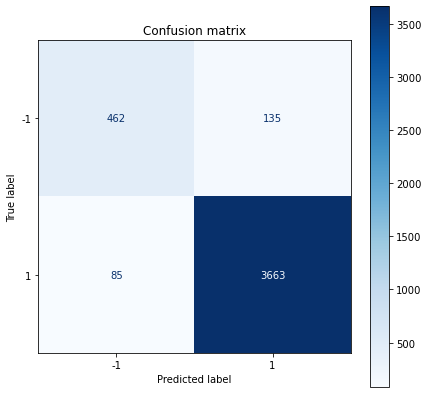

In [19]:
dt_smote = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_pred_smote , dt_acc_smote = build_model(dt_smote, X_train_smote, y_train_smote, teX, teY)

### Adaboost Classifier w/ SMOTE

Accuracy: 96.75%


Classification Report:

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88       597
           1       0.98      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.94      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


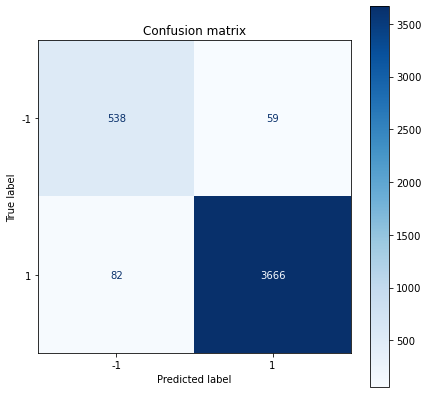

In [20]:
ada_smote = AdaBoostClassifier(n_estimators=200, random_state=0)
ada_pred_smote ,ada_acc_smote = build_model(ada_smote, X_train_smote, y_train_smote, teX, teY)

### 2. ADASYN

In [21]:
adasyn_oversampler = ADASYN(random_state=0)
X_res, y_res = adasyn_oversampler.fit_resample(trX, trY)

### KNN w/ ADASYN

Accuracy: 97.93%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


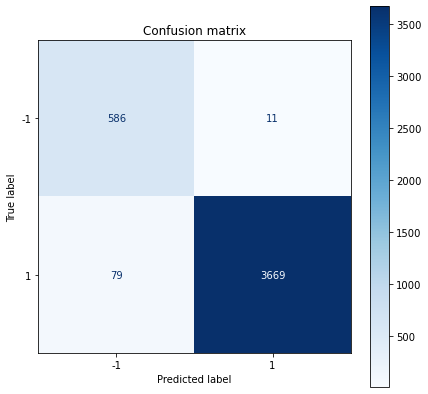

In [22]:
knn_adasyn = KNeighborsClassifier(n_neighbors=3)
knn_pred_adasyn , knn_acc_adasyn = build_model(knn_adasyn, X_res, y_res, teX, teY)

### Decision Tree Classifier w/ ADASYN

Accuracy: 92.22%


Classification Report:

              precision    recall  f1-score   support

          -1       0.73      0.69      0.71       597
           1       0.95      0.96      0.96      3748

    accuracy                           0.92      4345
   macro avg       0.84      0.82      0.83      4345
weighted avg       0.92      0.92      0.92      4345

---------------------------------------------


Confusion Matrix:


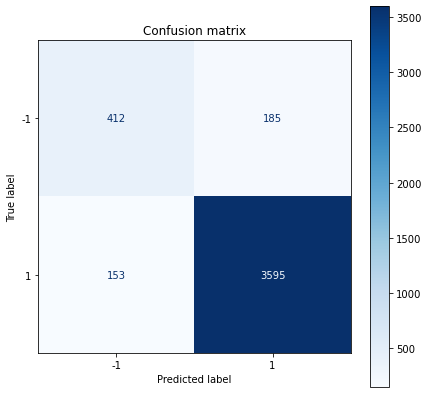

In [23]:
dt_adasyn = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_pred_adasyn , dt_acc_adasyn = build_model(dt_adasyn, X_res, y_res, teX, teY)

### Adaboost Classifier w/ ADASYN

Accuracy: 96.73%


Classification Report:

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88       597
           1       0.98      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.94      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


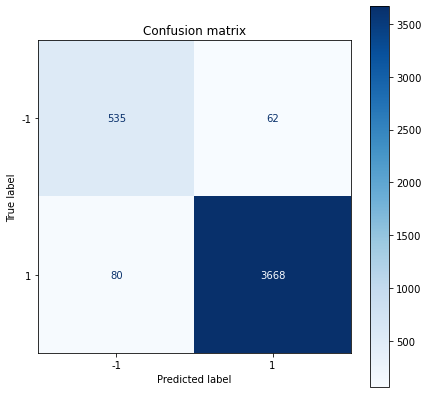

In [24]:
ada_adasyn = AdaBoostClassifier(n_estimators=200, random_state=0)
ada_pred_adasyn , ada_acc_adasyn = build_model(ada_adasyn, X_res, y_res, teX, teY)

### 3. Random Undersampling

In [25]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(trX, trY)

### KNN w/ Random Undersampling

Accuracy: 96.23%


Classification Report:

              precision    recall  f1-score   support

          -1       0.79      1.00      0.88       597
           1       1.00      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.89      0.98      0.93      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


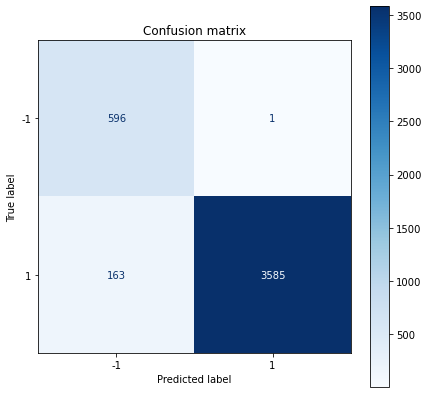

In [26]:
knn_rus = KNeighborsClassifier(n_neighbors=3)
knn_pred_rus , knn_acc_rus = build_model(knn_rus, X_resampled, y_resampled, teX, teY)

### Decision Tree Classifier w/ Random Undersampling

Accuracy: 90.84%


Classification Report:

              precision    recall  f1-score   support

          -1       0.63      0.82      0.71       597
           1       0.97      0.92      0.95      3748

    accuracy                           0.91      4345
   macro avg       0.80      0.87      0.83      4345
weighted avg       0.92      0.91      0.91      4345

---------------------------------------------


Confusion Matrix:


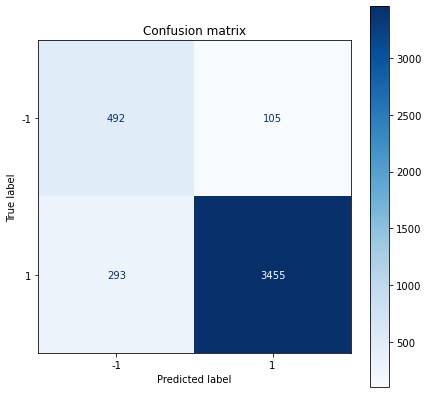

In [27]:
dt_rus = DecisionTreeClassifier(criterion="entropy", random_state=0)
dt_pred_rus ,dt_acc_rus = build_model(dt_rus, X_resampled, y_resampled, teX, teY)

### Adaboost Classifier w/ Random Undersampling

Accuracy: 96.23%


Classification Report:

              precision    recall  f1-score   support

          -1       0.80      0.96      0.87       597
           1       0.99      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.90      0.96      0.93      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


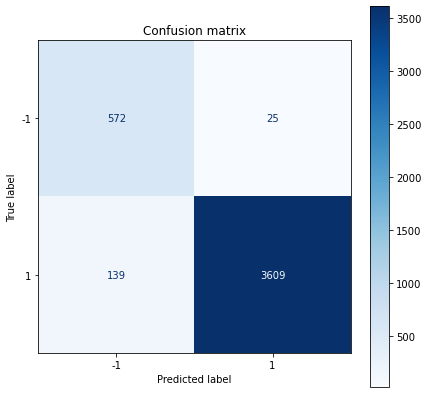

In [28]:
ada_rus = AdaBoostClassifier(n_estimators=200, random_state=0)
ada_pred_rus , ada_acc_rus = build_model(ada_rus, X_resampled, y_resampled, teX, teY)

### Plot

In [29]:
baseline_acc = [knn_acc, ada_acc, dt_acc]
smote_acc = [knn_acc_smote, ada_acc_smote, dt_acc_smote]
adasyn_acc= [knn_acc_adasyn , ada_acc_adasyn, dt_acc_adasyn]
rus_acc = [knn_acc_rus, ada_acc_rus, dt_acc_rus]
plot_acc = [baseline_acc, smote_acc, adasyn_acc, rus_acc]
models = ['KNN' , 'Adaboost', 'Decision Tree']

In [30]:
def accuracy_with_over_under_sampling(models, plot_acc):
    
    plt.figure(figsize=(10,7))

    axis_1 = plt.plot(models, plot_acc[0], color='red', marker='o', 
                     linestyle='dashdot', label = 'Baseline')
    axis_2 = plt.plot(models, plot_acc[1], color='blue', marker='o',
                     linestyle='dashdot', label = 'SMOTE')
    axis_3 = plt.plot(models, plot_acc[2], color='black', marker='o',
                     linestyle='dashdot', label = 'ADASYN')
    axis_4 = plt.plot(models, plot_acc[3], color='cyan', marker='o',
                     linestyle='dashdot', label = 'Random Undersampling')
    
    plt.title("Over/Under-Sampling Methods")
    plt.xlabel('Model')
    plt.ylabel('Accuracy %')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show

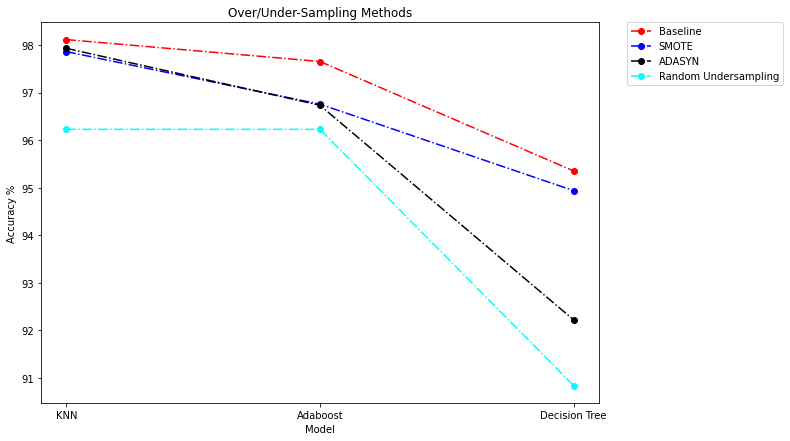

In [31]:
accuracy_with_over_under_sampling(models, plot_acc)

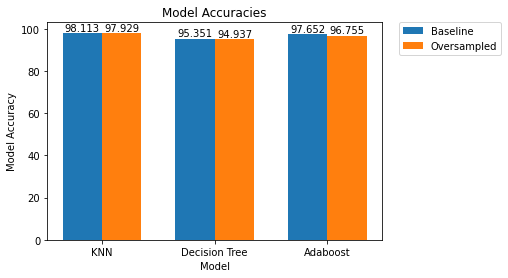

In [32]:
models = ['KNN' , 'Decision Tree' , 'Adaboost']
baseline_acc = [knn_acc , dt_acc , ada_acc]
oversampling_acc = [knn_acc_adasyn, dt_acc_smote, ada_acc_smote]

x = np.arange(len(models))  # the label locations
width = 0.35 

fig, ax = plt.subplots()

p1 = ax.bar(x - width/2, baseline_acc, width, label="Baseline")
p2 = ax.bar(x + width/2, oversampling_acc, width, label="Oversampled")

ax.set_xlabel("Model")
plt.xticks(x, models)
ax.set_ylabel("Model Accuracy")
ax.set_title('Model Accuracies')
ax.bar_label(p1)
ax.bar_label(p2)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Question 3

### KNN w/ PCA

Accuracy: 97.33%


Classification Report:

              precision    recall  f1-score   support

          -1       0.86      0.96      0.91       597
           1       0.99      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.97      0.95      4345
weighted avg       0.98      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


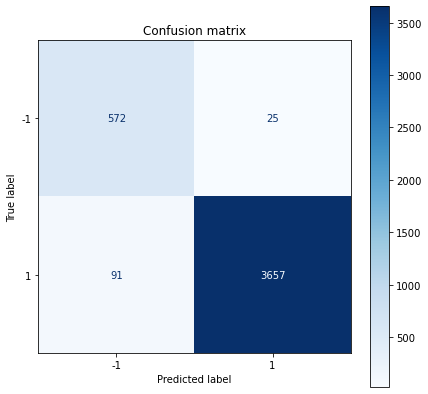

Accuracy: 97.33%


Classification Report:

              precision    recall  f1-score   support

          -1       0.86      0.95      0.91       597
           1       0.99      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.97      0.95      4345
weighted avg       0.98      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


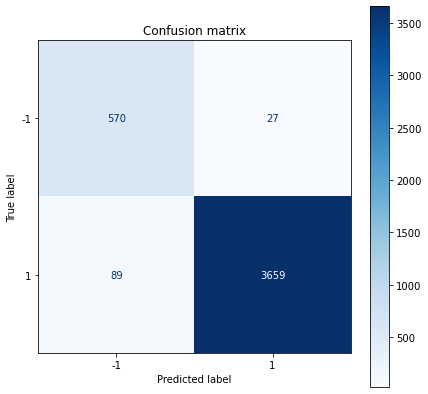

Accuracy: 97.45%


Classification Report:

              precision    recall  f1-score   support

          -1       0.86      0.97      0.91       597
           1       0.99      0.98      0.99      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.97      0.95      4345
weighted avg       0.98      0.97      0.98      4345

---------------------------------------------


Confusion Matrix:


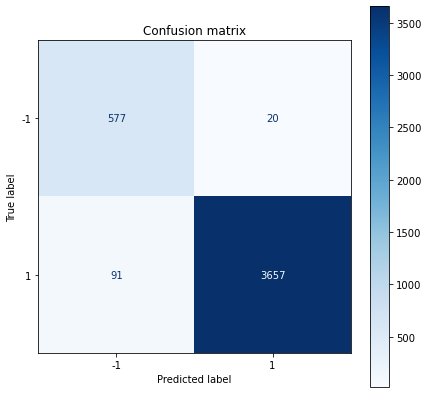

Accuracy: 97.91%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


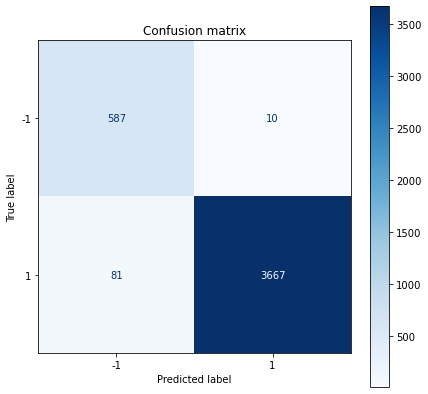

Accuracy: 97.93%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


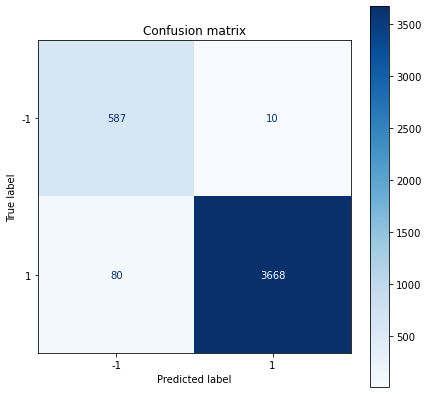

Accuracy: 97.86%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


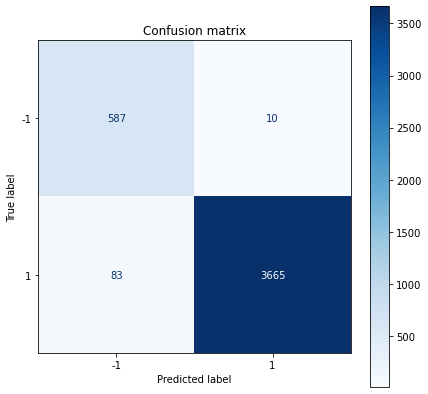

Accuracy: 97.86%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


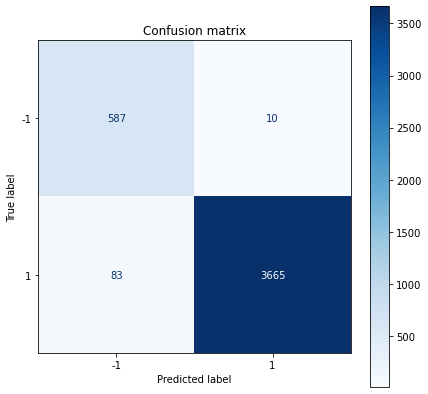

Accuracy: 97.86%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       597
           1       1.00      0.98      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.94      0.98      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


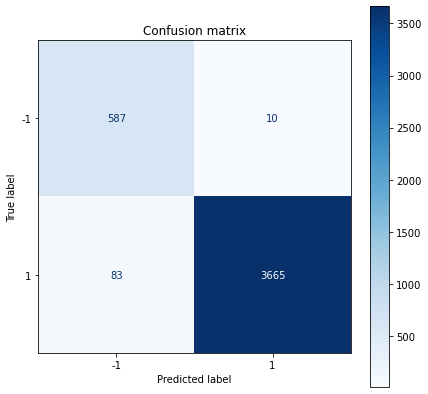

In [33]:
knn_pca = KNeighborsClassifier(n_neighbors=3)

num_features_knn_pca = []
accuracy_knn_pca = []

for nf in range (3, 11):
    pca = PCA(n_components=nf, random_state=0)
    pca.fit(X_train_smote , y_train_smote)
    pca_train = pca.transform(X_train_smote)
    pca_test = pca.transform(teX)
    knn_pred_pca, knn_acc_pca = build_model(knn_pca, pca_train, y_train_smote, pca_test, teY)
    num_features_knn_pca.append(nf)
    accuracy_knn_pca.append(knn_acc_pca)

Text(0.5, 1.0, 'KNN with PCA')

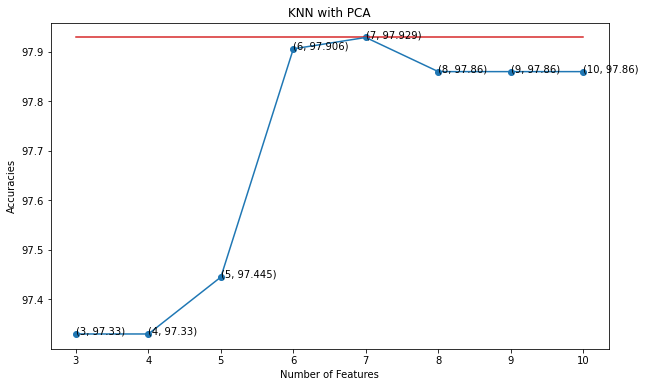

In [35]:
(markers, stemlines, baseline) = plt.stem(num_features_knn_pca, accuracy_knn_pca, bottom=knn_acc_adasyn)
plt.rcParams["figure.figsize"] = 10,6
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5)
plt.plot(num_features_knn_pca, accuracy_knn_pca)
for xy in zip(num_features_knn_pca, accuracy_knn_pca):                               
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.title('KNN with PCA')

In [36]:
opt_knn_pca_acc = np.max(accuracy_knn_pca)
opt_knn_pca_acc

97.929

In [37]:
opt_knn_pca_acc_index = accuracy_knn_pca.index(opt_knn_pca_acc)
opt_knn_pca_acc_index

4

In [38]:
opt_knn_pca_nf = num_features_knn_pca[opt_knn_pca_acc_index]
opt_knn_pca_nf

7

### Decision Tree w/ Recursive Feature Elimination

Accuracy: 98.00%


Classification Report:

              precision    recall  f1-score   support

          -1       0.96      0.90      0.92       597
           1       0.98      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.97      0.94      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


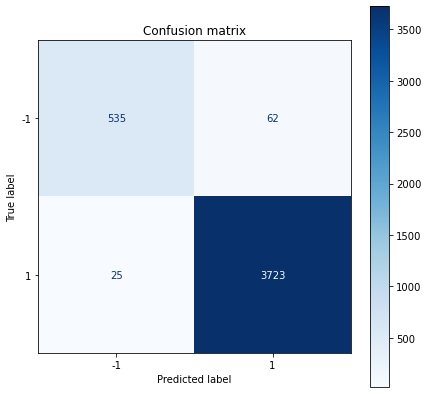

Accuracy: 98.34%


Classification Report:

              precision    recall  f1-score   support

          -1       0.96      0.91      0.94       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.97      0.95      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


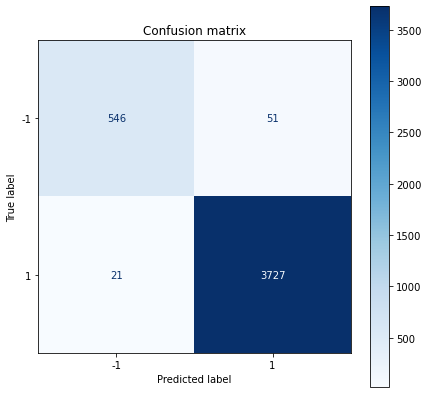

Accuracy: 97.65%


Classification Report:

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.95      0.95      0.95      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


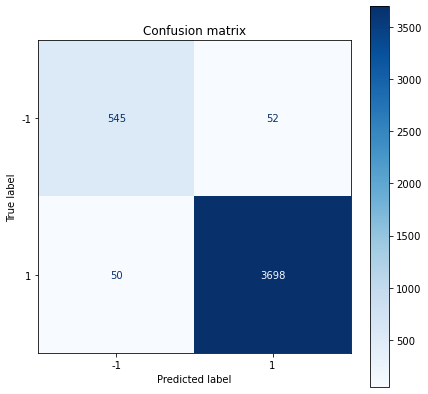

Accuracy: 96.34%


Classification Report:

              precision    recall  f1-score   support

          -1       0.88      0.85      0.86       597
           1       0.98      0.98      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.93      0.92      0.92      4345
weighted avg       0.96      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


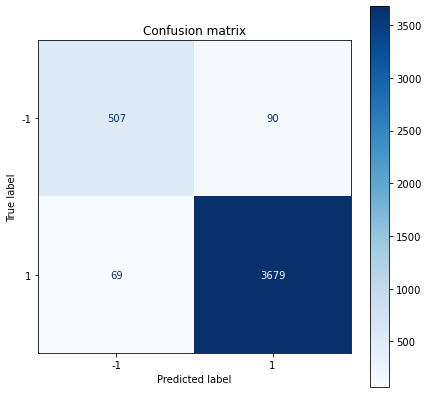

Accuracy: 95.93%


Classification Report:

              precision    recall  f1-score   support

          -1       0.89      0.80      0.84       597
           1       0.97      0.98      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.93      0.89      0.91      4345
weighted avg       0.96      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


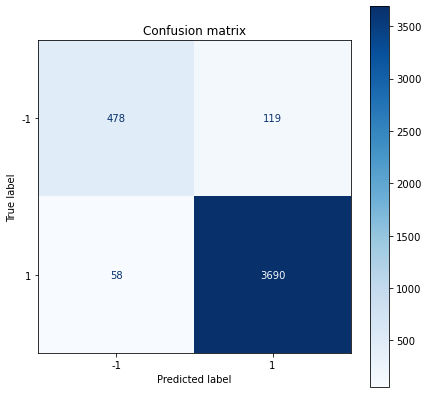

Accuracy: 95.01%


Classification Report:

              precision    recall  f1-score   support

          -1       0.84      0.79      0.81       597
           1       0.97      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.90      0.88      0.89      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


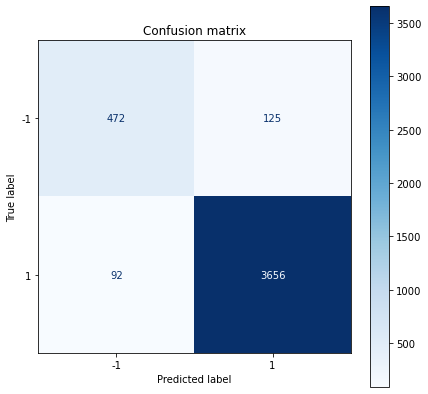

Accuracy: 95.14%


Classification Report:

              precision    recall  f1-score   support

          -1       0.85      0.78      0.82       597
           1       0.97      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.91      0.88      0.89      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


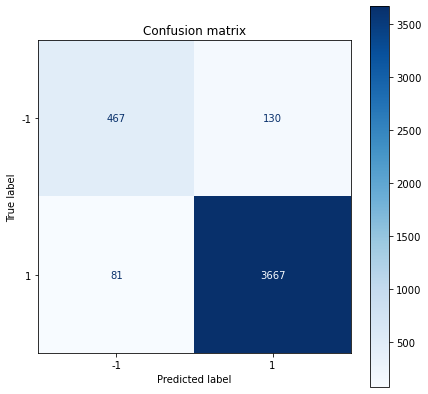

Accuracy: 94.94%


Classification Report:

              precision    recall  f1-score   support

          -1       0.84      0.77      0.81       597
           1       0.96      0.98      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.90      0.88      0.89      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


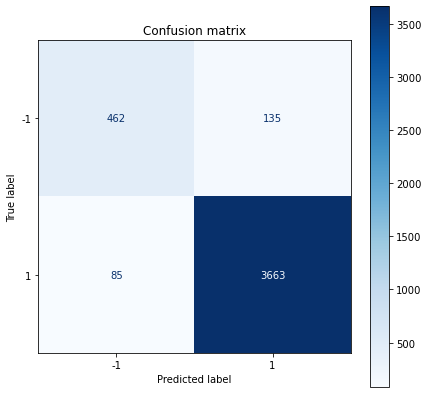

In [39]:
dt_rfe = DecisionTreeClassifier(criterion="entropy", random_state=0) 
num_features_dt_rfe = []
accuracy_dt_rfe = []

for nf in range(3,11):
    rfe_selector = RFE(dt_rfe, n_features_to_select=nf)
    rfe_selector.fit(X_train_smote, y_train_smote)
    rfe_train = rfe_selector.transform(X_train_smote)
    rfe_test = rfe_selector.transform(teX)
    dt_pred_rfe , dt_acc_rfe = build_model(dt_rfe, rfe_train, y_train_smote, rfe_test, teY)
    num_features_dt_rfe.append(nf)
    accuracy_dt_rfe.append(dt_acc_rfe)

Text(0.5, 1.0, 'Decision Tree with RFE')

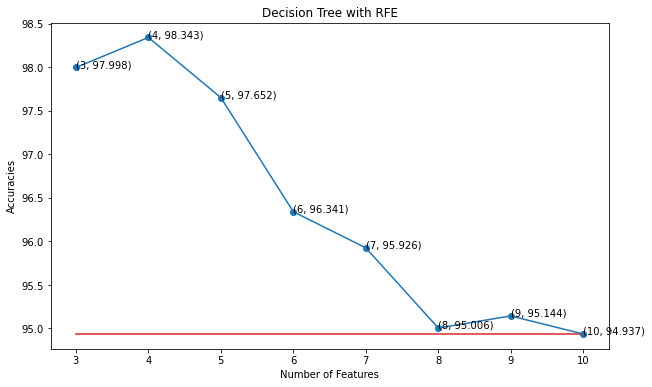

In [40]:
(markers, stemlines, baseline) = plt.stem(num_features_dt_rfe, accuracy_dt_rfe, bottom=dt_acc_smote)
plt.rcParams["figure.figsize"] = 10,6
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(num_features_dt_rfe, accuracy_dt_rfe)
for xy in zip(num_features_dt_rfe, accuracy_dt_rfe):                               
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.title('Decision Tree with RFE')

In [41]:
opt_dt_rfe_acc = np.max(accuracy_dt_rfe)
opt_dt_rfe_acc

98.343

In [42]:
opt_dt_rfe_acc_index = accuracy_dt_rfe.index(opt_dt_rfe_acc)
opt_dt_rfe_acc_index

1

In [43]:
opt_dt_rfe_nf = num_features_dt_rfe[opt_dt_rfe_acc_index]
opt_dt_rfe_nf

4

### Decision Tree w/ PCA

Accuracy: 98.67%


Classification Report:

              precision    recall  f1-score   support

          -1       0.94      0.96      0.95       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.99      4345
   macro avg       0.97      0.98      0.97      4345
weighted avg       0.99      0.99      0.99      4345

---------------------------------------------


Confusion Matrix:


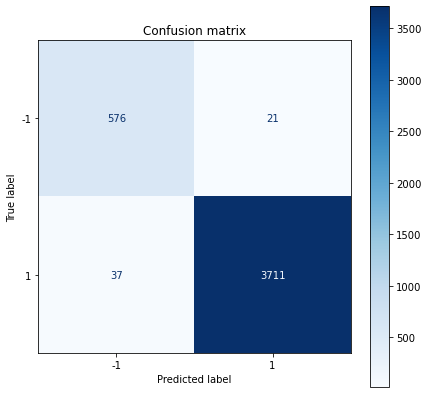

Accuracy: 98.43%


Classification Report:

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.96      0.97      0.97      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


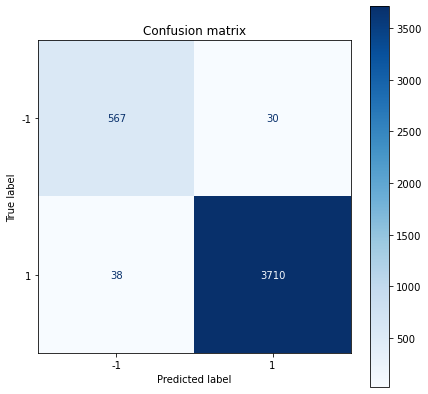

Accuracy: 98.25%


Classification Report:

              precision    recall  f1-score   support

          -1       0.93      0.94      0.94       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.96      0.97      0.96      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


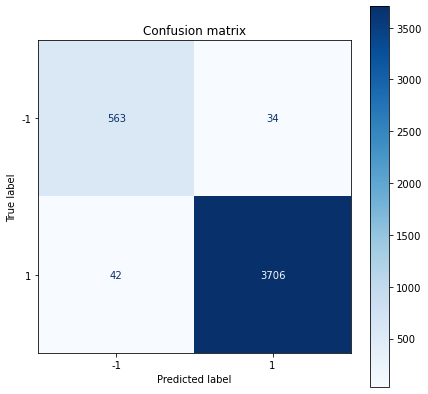

Accuracy: 98.37%


Classification Report:

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.96      0.97      0.97      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


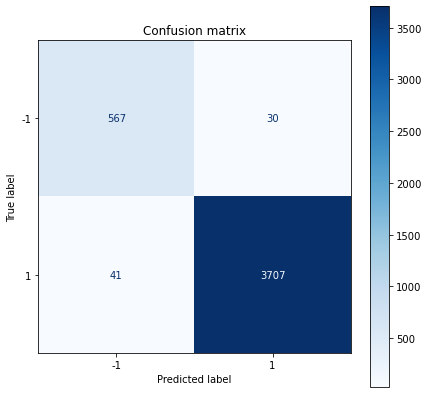

Accuracy: 98.34%


Classification Report:

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.98      4345
   macro avg       0.96      0.97      0.97      4345
weighted avg       0.98      0.98      0.98      4345

---------------------------------------------


Confusion Matrix:


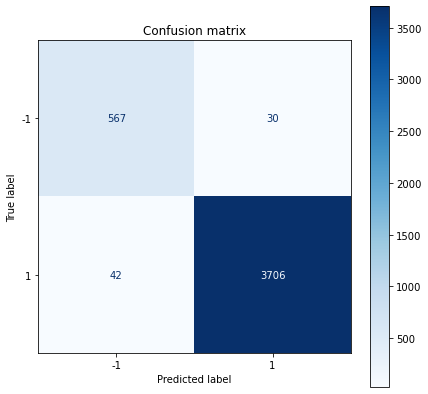

Accuracy: 97.19%


Classification Report:

              precision    recall  f1-score   support

          -1       0.89      0.90      0.90       597
           1       0.98      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.94      0.94      0.94      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


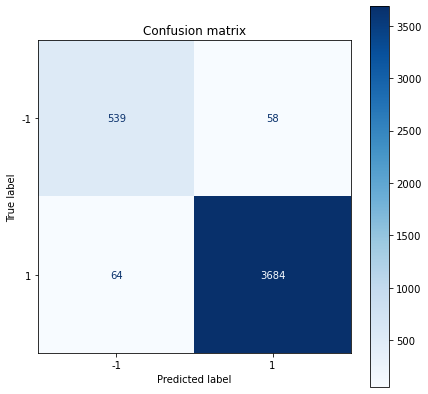

Accuracy: 95.14%


Classification Report:

              precision    recall  f1-score   support

          -1       0.82      0.83      0.82       597
           1       0.97      0.97      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.90      0.90      0.90      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


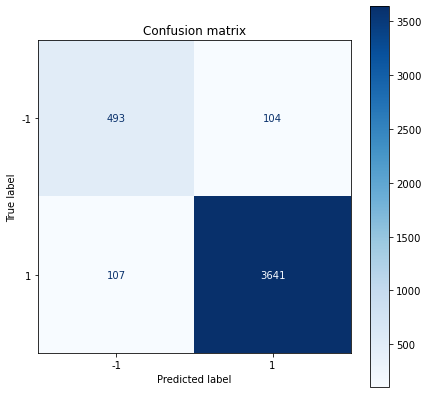

Accuracy: 94.82%


Classification Report:

              precision    recall  f1-score   support

          -1       0.81      0.81      0.81       597
           1       0.97      0.97      0.97      3748

    accuracy                           0.95      4345
   macro avg       0.89      0.89      0.89      4345
weighted avg       0.95      0.95      0.95      4345

---------------------------------------------


Confusion Matrix:


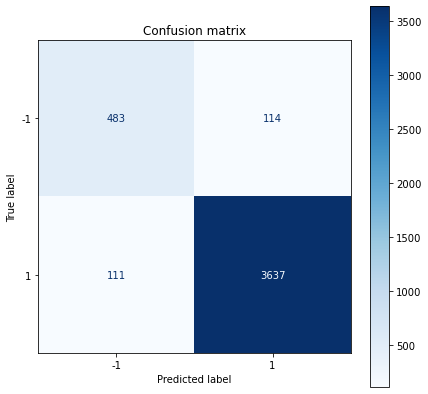

In [44]:
dt_pca = DecisionTreeClassifier(criterion="entropy", random_state=0)

num_features_dt_pca = []
accuracy_dt_pca = []

for nf in range (3, 11):
    pca = PCA(n_components=nf, random_state=0)
    pca.fit(X_train_smote , y_train_smote)
    pca_train = pca.transform(X_train_smote)
    pca_test = pca.transform(teX)
    dt_pred_pca, dt_acc_pca = build_model(dt_pca, pca_train, y_train_smote, pca_test, teY)
    num_features_dt_pca.append(nf)
    accuracy_dt_pca.append(dt_acc_pca)

Text(0.5, 1.0, 'Decision Tree with PCA')

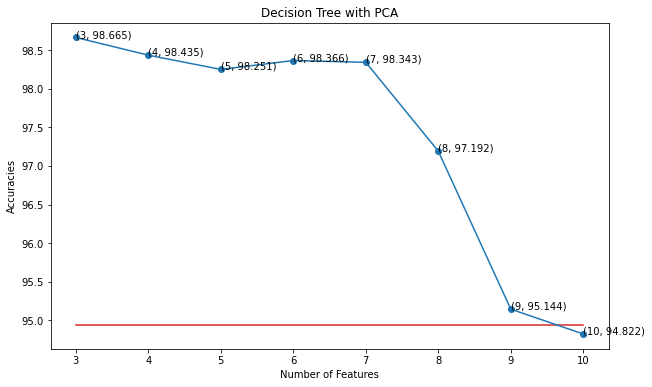

In [45]:
(markers, stemlines, baseline) = plt.stem(num_features_dt_pca, accuracy_dt_pca, bottom=dt_acc_smote)
plt.rcParams["figure.figsize"] = 10,6
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5)
plt.plot(num_features_dt_pca, accuracy_dt_pca)
for xy in zip(num_features_dt_pca, accuracy_dt_pca):                               
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.title('Decision Tree with PCA')

In [49]:
opt_dt_pca_acc = np.max(accuracy_dt_pca)
opt_dt_pca_acc

98.665

In [50]:
opt_dt_pca_acc_index = accuracy_dt_pca.index(opt_dt_pca_acc)
opt_dt_pca_acc_index

0

In [51]:
opt_dt_pca_nf = num_features_dt_pca[opt_dt_pca_acc_index]
opt_dt_pca_nf

3

### Adaboost w/ Recursive Feature Elimination

Accuracy: 95.70%


Classification Report:

              precision    recall  f1-score   support

          -1       0.77      0.98      0.86       597
           1       1.00      0.95      0.97      3748

    accuracy                           0.96      4345
   macro avg       0.88      0.97      0.92      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


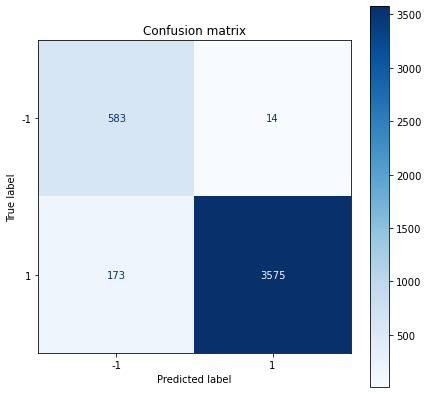

Accuracy: 96.20%


Classification Report:

              precision    recall  f1-score   support

          -1       0.80      0.97      0.88       597
           1       1.00      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.90      0.97      0.93      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


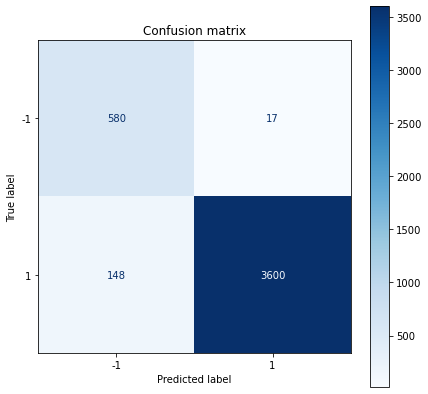

Accuracy: 96.52%


Classification Report:

              precision    recall  f1-score   support

          -1       0.82      0.96      0.88       597
           1       0.99      0.97      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.91      0.96      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


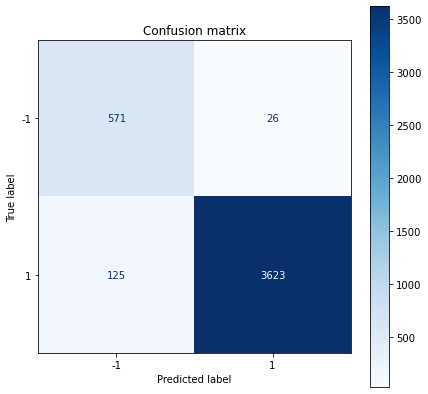

Accuracy: 96.13%


Classification Report:

              precision    recall  f1-score   support

          -1       0.81      0.94      0.87       597
           1       0.99      0.97      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.90      0.95      0.92      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


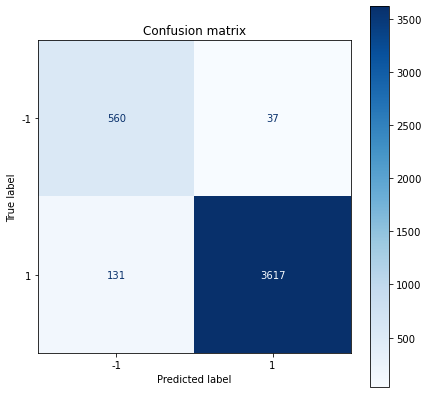

Accuracy: 97.22%


Classification Report:

              precision    recall  f1-score   support

          -1       0.87      0.94      0.90       597
           1       0.99      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.96      0.94      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


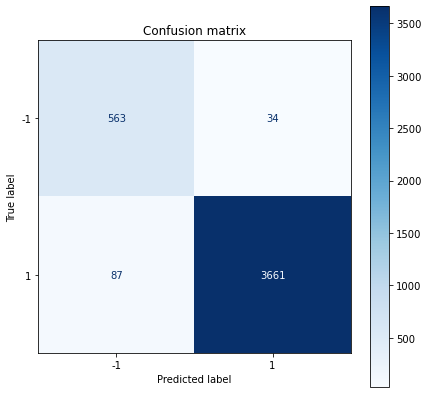

Accuracy: 96.59%


Classification Report:

              precision    recall  f1-score   support

          -1       0.85      0.91      0.88       597
           1       0.99      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.92      0.94      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


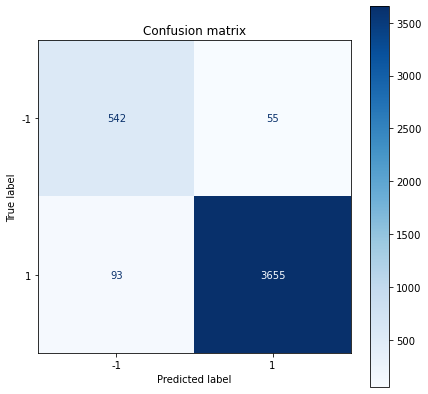

Accuracy: 96.96%


Classification Report:

              precision    recall  f1-score   support

          -1       0.86      0.92      0.89       597
           1       0.99      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.95      0.94      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


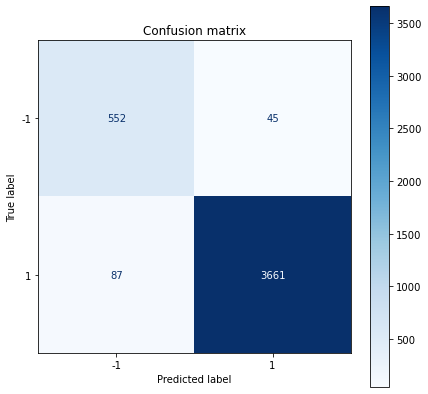

Accuracy: 96.75%


Classification Report:

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88       597
           1       0.98      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.94      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


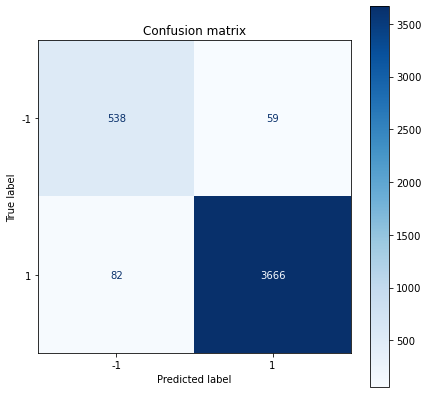

In [52]:
ada_rfe = AdaBoostClassifier(n_estimators=200, random_state=0)
num_features_ada_rfe = []
accuracy_ada_rfe = []

for nf in range(3,11):
    rfe_selector = RFE(ada_rfe, n_features_to_select=nf)
    rfe_selector.fit(X_train_smote, y_train_smote)
    rfe_train = rfe_selector.transform(X_train_smote)
    rfe_test = rfe_selector.transform(teX)
    ada_pred_rfe , ada_acc_rfe = build_model(ada_rfe, rfe_train, y_train_smote, rfe_test, teY)
    num_features_ada_rfe.append(nf)
    accuracy_ada_rfe.append(ada_acc_rfe)

Text(0.5, 1.0, 'Adaboost with RFE')

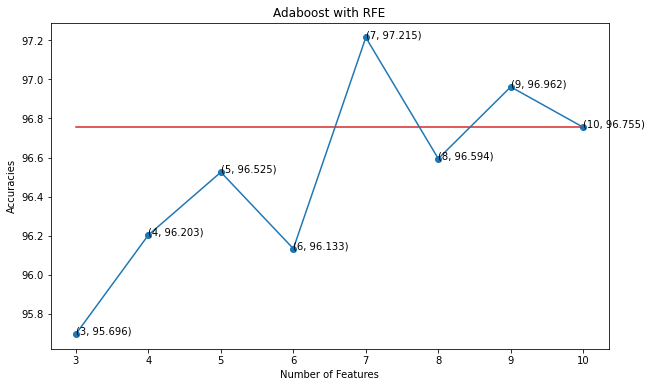

In [53]:
(markers, stemlines, baseline) = plt.stem(num_features_ada_rfe, accuracy_ada_rfe, bottom=ada_acc_smote)
plt.rcParams["figure.figsize"] = 10,6
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5 )
plt.plot(num_features_ada_rfe, accuracy_ada_rfe)
for xy in zip(num_features_ada_rfe, accuracy_ada_rfe):                               
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.title('Adaboost with RFE')

In [54]:
opt_ada_rfe_acc = np.max(accuracy_ada_rfe)
opt_ada_rfe_acc

97.215

In [55]:
opt_ada_rfe_acc_index = accuracy_ada_rfe.index(opt_ada_rfe_acc)
opt_ada_rfe_acc_index

4

In [56]:
opt_ada_rfe_nf = num_features_ada_rfe[opt_ada_rfe_acc_index]
opt_ada_rfe_nf

7

### Adaboost w/ PCA

Accuracy: 96.02%


Classification Report:

              precision    recall  f1-score   support

          -1       0.79      0.96      0.87       597
           1       0.99      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.89      0.96      0.92      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


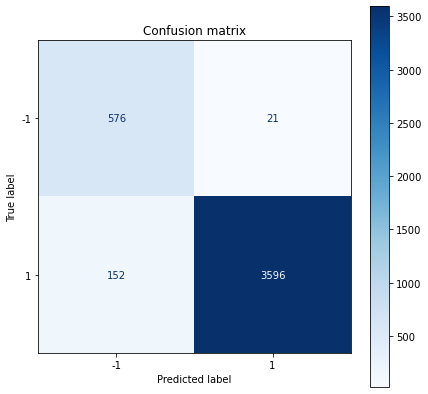

Accuracy: 96.36%


Classification Report:

              precision    recall  f1-score   support

          -1       0.81      0.96      0.88       597
           1       0.99      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.90      0.96      0.93      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


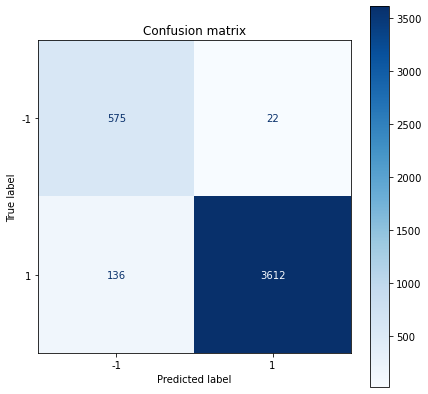

Accuracy: 96.55%


Classification Report:

              precision    recall  f1-score   support

          -1       0.82      0.96      0.88       597
           1       0.99      0.97      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.91      0.97      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


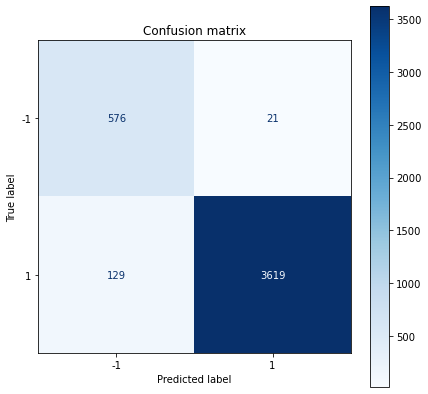

Accuracy: 96.09%


Classification Report:

              precision    recall  f1-score   support

          -1       0.79      0.96      0.87       597
           1       0.99      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.89      0.96      0.92      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


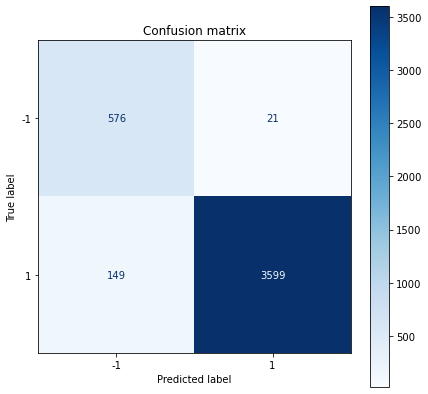

Accuracy: 96.11%


Classification Report:

              precision    recall  f1-score   support

          -1       0.79      0.97      0.87       597
           1       1.00      0.96      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.89      0.97      0.93      4345
weighted avg       0.97      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


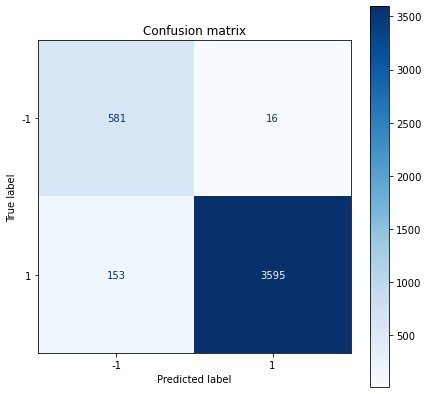

Accuracy: 96.11%


Classification Report:

              precision    recall  f1-score   support

          -1       0.81      0.94      0.87       597
           1       0.99      0.97      0.98      3748

    accuracy                           0.96      4345
   macro avg       0.90      0.95      0.92      4345
weighted avg       0.96      0.96      0.96      4345

---------------------------------------------


Confusion Matrix:


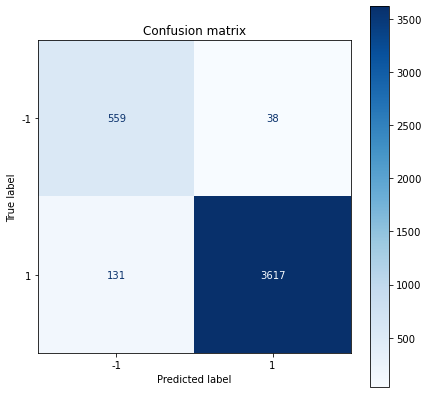

Accuracy: 97.22%


Classification Report:

              precision    recall  f1-score   support

          -1       0.86      0.95      0.90       597
           1       0.99      0.98      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.93      0.96      0.94      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


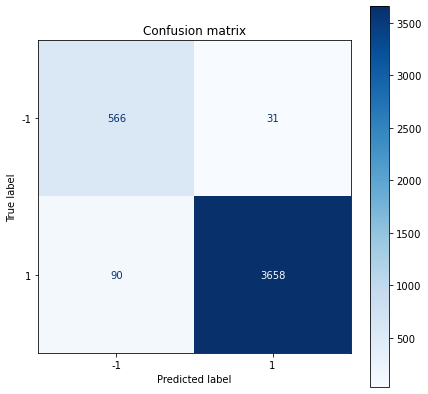

Accuracy: 96.64%


Classification Report:

              precision    recall  f1-score   support

          -1       0.84      0.93      0.88       597
           1       0.99      0.97      0.98      3748

    accuracy                           0.97      4345
   macro avg       0.92      0.95      0.93      4345
weighted avg       0.97      0.97      0.97      4345

---------------------------------------------


Confusion Matrix:


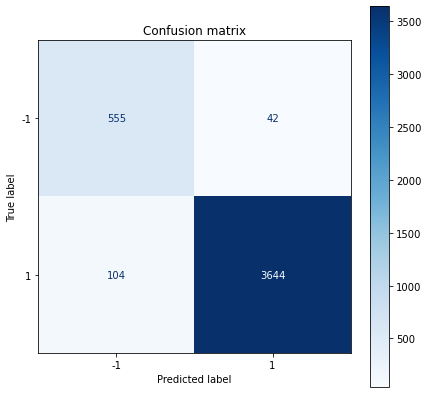

In [57]:
ada_pca = AdaBoostClassifier(n_estimators=200, random_state=0)

num_features_ada_pca = []
accuracy_ada_pca = []

for nf in range (3, 11):
    pca = PCA(n_components=nf, random_state=0)
    pca.fit(X_train_smote , y_train_smote)
    pca_train = pca.transform(X_train_smote)
    pca_test = pca.transform(teX)
    ada_pred_pca, ada_acc_pca = build_model(ada_pca, pca_train, y_train_smote, pca_test, teY)
    num_features_ada_pca.append(nf)
    accuracy_ada_pca.append(ada_acc_pca)

Text(0.5, 1.0, 'Adaboost with PCA')

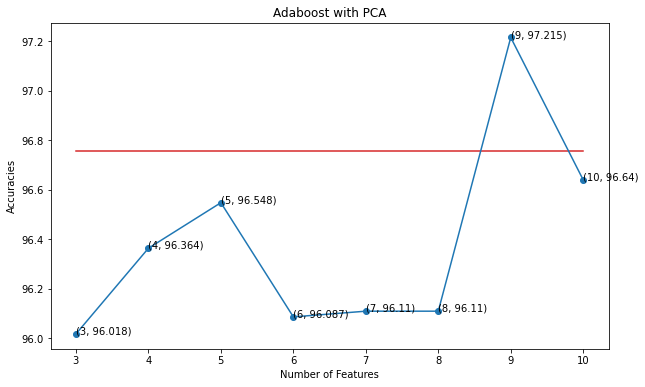

In [58]:
(markers, stemlines, baseline) = plt.stem(num_features_ada_pca, accuracy_ada_pca, bottom=ada_acc_smote)
plt.rcParams["figure.figsize"] = 10,6
plt.setp(stemlines, linestyle="-", color="white", linewidth=0.5)
plt.plot(num_features_ada_pca, accuracy_ada_pca)
for xy in zip(num_features_ada_pca, accuracy_ada_pca):                               
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 
plt.ylabel('Accuracies')
plt.xlabel('Number of Features')
plt.title('Adaboost with PCA')

In [74]:
opt_ada_pca_acc = np.max(accuracy_ada_pca)
opt_ada_pca_acc

97.215

In [75]:
opt_ada_pca_acc_index = accuracy_ada_pca.index(opt_ada_pca_acc)
opt_ada_pca_acc_index

6

In [76]:
opt_ada_pca_nf = num_features_ada_pca[opt_ada_pca_acc_index]
opt_ada_pca_nf

9

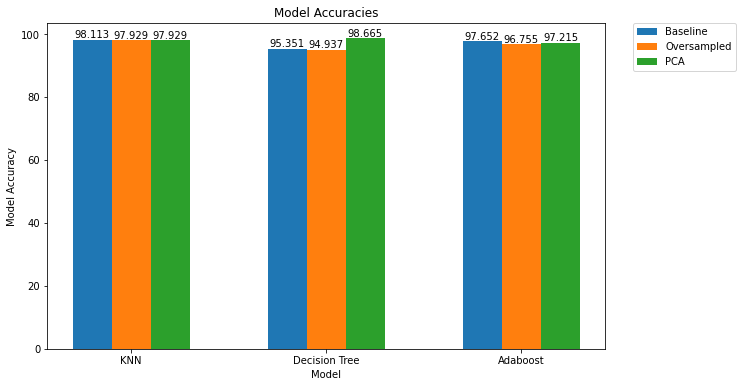

In [102]:
models = ['KNN' , 'Decision Tree' , 'Adaboost']
baseline_acc = [knn_acc , dt_acc , ada_acc]
oversampling_acc = [knn_acc_adasyn, dt_acc_smote, ada_acc_smote]
dim_red_acc = [opt_knn_pca_acc, opt_dt_pca_acc, opt_ada_pca_acc]

x = np.arange(len(models))  # the label locations
width = 0.20 

fig, ax = plt.subplots(figsize=(10, 6))

p1 = ax.bar(x - width, baseline_acc, width, align="center", label="Baseline")
p2 = ax.bar(x, oversampling_acc, width, align="center", label="Oversampled")
p3 = ax.bar(x + width, dim_red_acc, width, align="center", label="PCA")

ax.set_xlabel("Model")
plt.xticks(x, models)
ax.set_ylabel("Model Accuracy")
ax.set_title('Model Accuracies')
ax.bar_label(p1)
ax.bar_label(p2)
ax.bar_label(p3)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### TSNE before PCA

In [78]:
tsne_model = TSNE(n_components= 2, random_state=0)
X_train_tsne = tsne_model.fit_transform(trX)
X_test_tsne = tsne_model.fit_transform(teX)

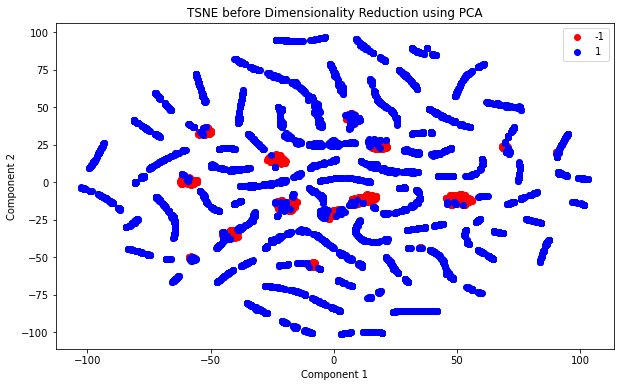

In [79]:
plt.figure(figsize=(10, 6))

labels = np.unique(trY)
colors = ["r", "b"]
    
for index, label in enumerate(labels):
    plt.scatter(X_train_tsne[trY == label, 0], X_train_tsne[trY == label, 1], c=colors[index], label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("TSNE before Dimensionality Reduction using PCA")
plt.legend()
plt.show()

### TSNE after PCA

In [12]:
pca = PCA(n_components=7, random_state=0)
pca.fit(X_train_smote , y_train_smote)
pca_train = pca.transform(X_train_smote)
pca_test = pca.transform(teX)

In [13]:
tsne_model = TSNE(n_components= 2, random_state=0)
X_train_tsne = tsne_model.fit_transform(pca_train)
X_test_tsne = tsne_model.fit_transform(pca_test)

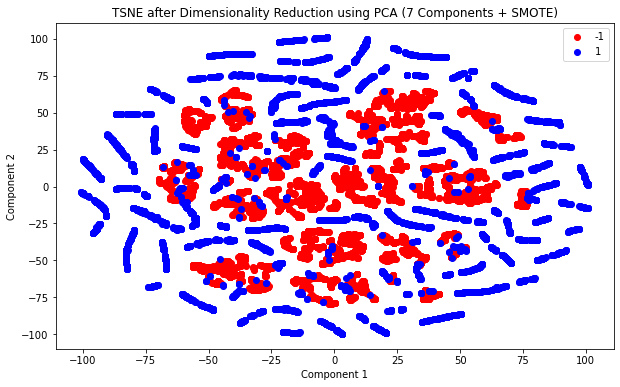

In [15]:
plt.figure(figsize=(10, 6))

labels = np.unique(trY)
colors = ["r", "b"]
    
for index, label in enumerate(labels):
    plt.scatter(X_train_tsne[y_train_smote == label, 0], X_train_tsne[y_train_smote == label, 1], c=colors[index], label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("TSNE after Dimensionality Reduction using PCA (7 Components + SMOTE)")
plt.legend()
plt.show()

In [83]:
pca = PCA(n_components=3, random_state=0)
pca.fit(X_train_smote , y_train_smote)
pca_train = pca.transform(X_train_smote)
pca_test = pca.transform(teX)

In [84]:
tsne_model = TSNE(n_components= 2, random_state=0)
X_train_tsne = tsne_model.fit_transform(pca_train)
X_test_tsne = tsne_model.fit_transform(pca_test)

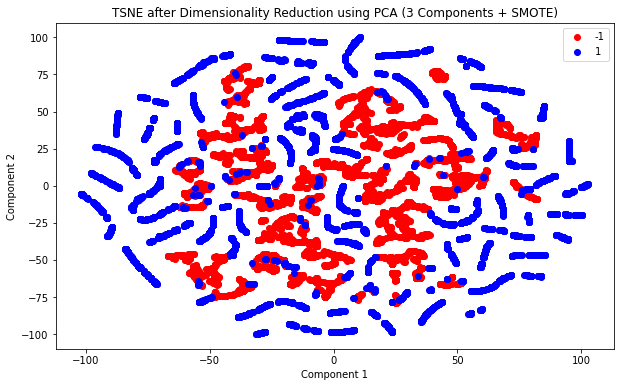

In [85]:
plt.figure(figsize=(10, 6))

labels = np.unique(trY)
colors = ["r", "b"]
    
for index, label in enumerate(labels):
    plt.scatter(X_train_tsne[y_train_smote == label, 0], X_train_tsne[y_train_smote == label, 1], c=colors[index], label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("TSNE after Dimensionality Reduction using PCA (3 Components + SMOTE)")
plt.legend()
plt.show()

In [86]:
pca = PCA(n_components=9, random_state=0)
pca.fit(X_train_smote , y_train_smote)
pca_train = pca.transform(X_train_smote)
pca_test = pca.transform(teX)

In [87]:
tsne_model = TSNE(n_components= 2, random_state=0)
X_train_tsne = tsne_model.fit_transform(pca_train)
X_test_tsne = tsne_model.fit_transform(pca_test)

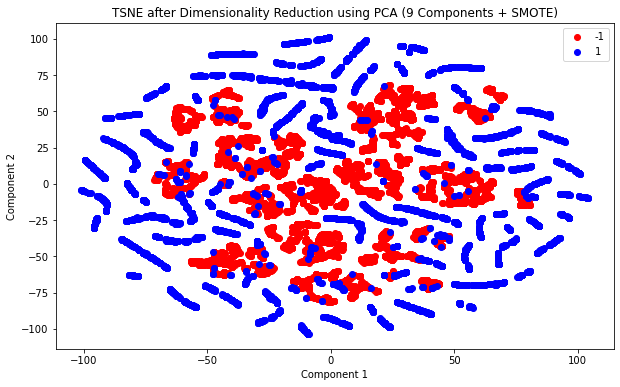

In [88]:
plt.figure(figsize=(10, 6))

labels = np.unique(trY)
colors = ["r", "b"]
    
for index, label in enumerate(labels):
    plt.scatter(X_train_tsne[y_train_smote == label, 0], X_train_tsne[y_train_smote == label, 1], c=colors[index], label=label)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("TSNE after Dimensionality Reduction using PCA (9 Components + SMOTE)")
plt.legend()
plt.show()

## Question 4

Accuracy: 98.83%


Classification Report:

              precision    recall  f1-score   support

          -1       0.96      0.95      0.96       597
           1       0.99      0.99      0.99      3748

    accuracy                           0.99      4345
   macro avg       0.98      0.97      0.98      4345
weighted avg       0.99      0.99      0.99      4345

---------------------------------------------


Confusion Matrix:


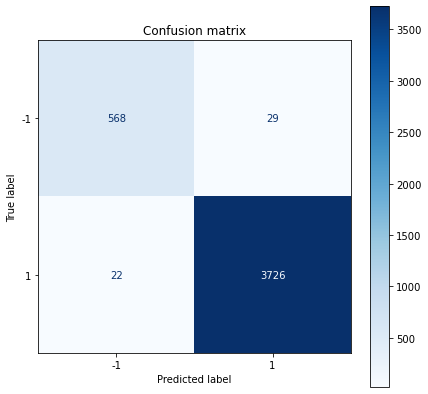

In [96]:
estimators = [('knn', make_pipeline(PCA(n_components=7, random_state=0),
                                    KNeighborsClassifier(n_neighbors=3))),
              ('dt', make_pipeline(PCA(n_components=3, random_state=0),
                                   DecisionTreeClassifier(criterion="entropy", random_state=0))),
              ('ada', make_pipeline(PCA(n_components=9, random_state=0),
                                    AdaBoostClassifier(n_estimators=200, random_state=0)))]

clf_stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
_, stacking_acc = build_model(clf_stacking, X_train_smote, y_train_smote, teX, teY)

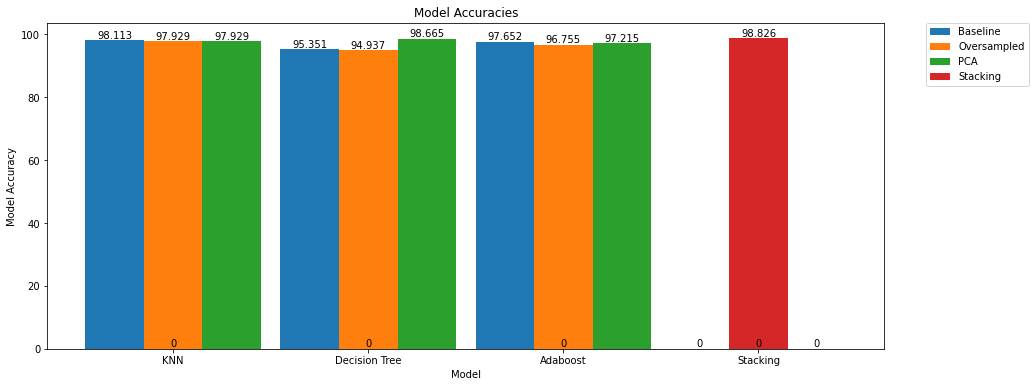

In [109]:
models = ['KNN' , 'Decision Tree' , 'Adaboost', 'Stacking']
baseline_acc = [knn_acc , dt_acc , ada_acc, 0]
oversampling_acc = [knn_acc_adasyn, dt_acc_smote, ada_acc_smote, 0]
dim_red_acc = [opt_knn_pca_acc, opt_dt_pca_acc, opt_ada_pca_acc, 0]
stacking = [0, 0, 0, stacking_acc]

x = np.arange(len(models))  # the label locations
width = 0.30 

fig, ax = plt.subplots(figsize=(15, 6))

p1 = ax.bar(x - width, baseline_acc, width, align="center", label="Baseline")
p2 = ax.bar(x, oversampling_acc, width, align="center", label="Oversampled")
p3 = ax.bar(x + width, dim_red_acc, width, align="center", label="PCA")
p4 = ax.bar(x, stacking, width, align="center", label="Stacking")

ax.set_xlabel("Model")
plt.xticks(x, models)
ax.set_ylabel("Model Accuracy")
ax.set_title('Model Accuracies')
ax.bar_label(p1)
ax.bar_label(p2)
ax.bar_label(p3)
ax.bar_label(p4)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()